# Movies Recommendation System

#### DSCI521
Martin Mathew, Atheer Albarqi, Emily Wang, Abhijit Purru

### 1. Introduction

There is more and more information on the Internet. When users are faced with a large amount of data information, they cannot obtain the part that is really useful to them, resulting in the problem of information overload. Recommendation systems are one solution to information overload. The recommendation system determines the application of items/services that users currently need or are interested in based on their historical behaviors, social relationships, points of interest and other information. Recommendation is to predict how much a user likes an item/service that he has not used before (usually in a scoring mechanism). The item/service can be movies, books, music, news, etc. The core task of propulsion system is to connect users with information.

### 2. Objective

In this project, we will develop recommender systems (Collaborative Filtering) and K-nearest neighbors algorithm (KNN) that can automatically predict the resutls of top 10 movies by using machine learning approach. We will also show the details with our Exploratory Data Analysis (EDA).

### 3. Related Work

This study is inspired by research paper named "Neural Collaborative Filtering" by Xiangnan He and Xia hu, ect. We learned the basic knowladge about Collaborative Filtering method for our recommender systems.  

https://www.kaggle.com/heeraldedhia/movie-ratings-and-recommendation-using-knn
Another inspiration in the project by the project "TMDB Score Prediction", which used a similar dataset to determine the success of moives prediction.

### 4. Dataset and Methods

#### 4.1 Dataset
The dataset is found from this link: (https://datasets.imdbws.com/). It contains many different datasets such as name-basics, title, rating, episode, ect which includes real data with direct movies reocrds from people's searching. 

IMDb Dataset Details: 
Each dataset is contained in a gzipped, tab-separated-values (TSV) formatted file in the UTF-8 character set. The first line in each file contains headers that describe what is in each column. A ‘\N’ is used to denote that a particular field is missing or null for that title/name.

For example:
title.ratings.tsv.gz – Contains the IMDb rating and votes information for titles
tconst (string) - alphanumeric unique identifier of the title
averageRating – weighted average of all the individual user ratings
numVotes - number of votes the title has received

#### 4.2 Methods
In this work, we will predict top 10 movies based on our datasets by using KNN in python. 

### 5. Data Pre-Processing

In [3]:
# Import necessary libaries
import pandas as pd
import requests, sys, os, gzip, shutil

In [4]:
# Download BeautifulSoup if not present
!{sys.executable} -m pip install bs4
from bs4 import BeautifulSoup

In [6]:
# Gets the soup from the webpage
def scrape_soup(website_link):
    page_response = requests.get(website_link)
    page_soup = BeautifulSoup(page_response.text, 'html.parser')
    return page_soup

page_soup = scrape_soup("https://datasets.imdbws.com/")
page_soup

<html>
<head>
<meta content="noindex" name="robots"/>
</head>
<body>
<h3>IMDb data files available for download</h3>

Documentation for these data files can be found on <a href="http://www.imdb.com/interfaces/"> http://www.imdb.com/interfaces/ </a>
<ul><a href="https://datasets.imdbws.com/name.basics.tsv.gz">name.basics.tsv.gz</a></ul>
<ul><a href="https://datasets.imdbws.com/title.akas.tsv.gz">title.akas.tsv.gz</a></ul>
<ul><a href="https://datasets.imdbws.com/title.basics.tsv.gz">title.basics.tsv.gz</a></ul>
<ul><a href="https://datasets.imdbws.com/title.crew.tsv.gz">title.crew.tsv.gz</a></ul>
<ul><a href="https://datasets.imdbws.com/title.episode.tsv.gz">title.episode.tsv.gz</a></ul>
<ul><a href="https://datasets.imdbws.com/title.principals.tsv.gz">title.principals.tsv.gz</a></ul>
<ul><a href="https://datasets.imdbws.com/title.ratings.tsv.gz">title.ratings.tsv.gz</a></ul>
</body>
</html>

In [7]:
# Gets alls links for tsv.gz files from this webpage
def scrape_tsv_links(soup):
    tsv_links = []
    first = True
    for link in soup.find_all('a'):
        if first:
            first = False
        else:
            tsv_link = link.get('href')
            tsv_title = tsv_link.replace("https://datasets.imdbws.com/","")
            tsv_title = tsv_title.replace(".gz","")
            tsv_links.append((tsv_title, tsv_link))
    return tsv_links
        
tsv_links = scrape_tsv_links(page_soup)
tsv_links

[('name.basics.tsv', 'https://datasets.imdbws.com/name.basics.tsv.gz'),
 ('title.akas.tsv', 'https://datasets.imdbws.com/title.akas.tsv.gz'),
 ('title.basics.tsv', 'https://datasets.imdbws.com/title.basics.tsv.gz'),
 ('title.crew.tsv', 'https://datasets.imdbws.com/title.crew.tsv.gz'),
 ('title.episode.tsv', 'https://datasets.imdbws.com/title.episode.tsv.gz'),
 ('title.principals.tsv',
  'https://datasets.imdbws.com/title.principals.tsv.gz'),
 ('title.ratings.tsv', 'https://datasets.imdbws.com/title.ratings.tsv.gz')]

In [8]:
# Downloads and extracts the files that are specified
def download_files(links, files):
    for title, link in links:
        tsv_path = os.getcwd() + "/datasets/" + title
        if title in files and not os.path.exists(tsv_path):
            response = requests.get(link)
            response_content = response.content
            with open(tsv_path + ".gz", 'wb') as tsv_file:
                tsv_file.write(response_content)
            with gzip.open(tsv_path + ".gz", 'rb') as gz:
                with open(tsv_path, 'wb') as tsv:
                    shutil.copyfileobj(gz, tsv)
            os.remove(tsv_path + ".gz")
            print("File added: " + title)
        elif os.path.exists(tsv_path):
            print("File already exists")
            
download_files(tsv_links, ['title.basics.tsv', 'title.ratings.tsv'])

File already exists
File already exists


In [9]:
# Saves movie data to dataframe for future use
def get_movie_data(file_location):
    movie = pd.read_csv(file_location, sep='\t')
    return movie.loc[movie.titleType == 'movie', :].set_index('tconst')

movies_tsv = 'datasets/title.basics.tsv'
movies = get_movie_data(movies_tsv)
movies.head(10)

/tmp/ipykernel_2327/4248011252.py:7: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  movies = get_movie_data(movies_tsv)


,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
tconst,,,,,,,,
tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N
tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography"
tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama
tt0000615,movie,Robbery Under Arms,Robbery Under Arms,0,1907,\N,\N,Drama
tt0000630,movie,Hamlet,Amleto,0,1908,\N,\N,Drama
tt0000675,movie,Don Quijote,Don Quijote,0,1908,\N,\N,Drama
tt0000679,movie,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,0,1908,\N,120,"Adventure,Fantasy"
tt0000739,movie,El pastorcito de Torrente,El pastorcito de Torrente,0,1908,\N,\N,Drama
tt0000793,movie,Andreas Hofer,Andreas Hofer,0,1909,\N,\N,Drama


In [10]:
# Cleans the dataframe and removes unnecessary data points
def clean_movies_data(movies):
    remove_movies = movies.loc[movies.isAdult == 0, :]
    remove_genres = remove_movies.loc[remove_movies.genres != '\\N']
    remove_time = remove_genres.loc[remove_movies.runtimeMinutes != '\\N']
    remove_years = remove_time.loc[remove_time.startYear != '\\N']
    return remove_years[['primaryTitle', 'startYear', 'runtimeMinutes', 'genres']]

clean_movies = clean_movies_data(movies)
clean_movies.head(10)

,primaryTitle,startYear,runtimeMinutes,genres
tconst,,,,
tt0000574,The Story of the Kelly Gang,1906,70,"Action,Adventure,Biography"
tt0000591,The Prodigal Son,1907,90,Drama
tt0000679,The Fairylogue and Radio-Plays,1908,120,"Adventure,Fantasy"
tt0001184,Don Juan de Serrallonga,1910,58,"Adventure,Drama"
tt0001258,The White Slave Trade,1910,45,Drama
tt0001285,The Life of Moses,1909,50,"Biography,Drama,Family"
tt0001498,The Battle of Trafalgar,1911,51,War
tt0001592,In the Prime of Life,1911,52,Drama
tt0001790,"Les Misérables, Part 1: Jean Valjean",1913,60,Drama


In [11]:
# Saves movie ratings to dataframe for later access
def get_data(file_location):
    return pd.read_csv(file_location, sep='\t').set_index('tconst')

ratings_tsv = 'datasets/title.ratings.tsv'
ratings = get_data(ratings_tsv)
ratings.head(10)

,averageRating,numVotes
tconst,,
tt0000001,5.7,1864
tt0000002,6.0,244
tt0000003,6.5,1633
tt0000004,5.8,158
tt0000005,6.2,2459
tt0000006,5.2,164
tt0000007,5.5,766
tt0000008,5.4,2007
tt0000009,5.4,192


In [12]:
# Merges the two dataframes into one
def merge_data(first_set, second_set):
    return pd.merge(first_set, second_set, on='tconst', how='left')

combined_data = merge_data(clean_movies, ratings)
combined_data.head(10)

,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
tconst,,,,,,
tt0000574,The Story of the Kelly Gang,1906,70,"Action,Adventure,Biography",6.0,756.0
tt0000591,The Prodigal Son,1907,90,Drama,4.6,17.0
tt0000679,The Fairylogue and Radio-Plays,1908,120,"Adventure,Fantasy",5.3,65.0
tt0001184,Don Juan de Serrallonga,1910,58,"Adventure,Drama",3.9,20.0
tt0001258,The White Slave Trade,1910,45,Drama,5.8,141.0
tt0001285,The Life of Moses,1909,50,"Biography,Drama,Family",5.6,57.0
tt0001498,The Battle of Trafalgar,1911,51,War,7.7,12.0
tt0001592,In the Prime of Life,1911,52,Drama,5.5,14.0
tt0001790,"Les Misérables, Part 1: Jean Valjean",1913,60,Drama,6.0,44.0


In [13]:
# Further cleans the resulting dataframe
def clean_final_dataset(data):
    data.rename(columns={'primaryTitle':'title','startYear':'year','runtimeMinutes':'runtime'}, inplace=True)
    data.index.name = 'movieID'
    data.replace('', float('NaN'),inplace=True)
    data.dropna(inplace=True)
    return data

final_data = clean_final_dataset(combined_data)
final_data.head(10)

,title,year,runtime,genres,averageRating,numVotes
movieID,,,,,,
tt0000574,The Story of the Kelly Gang,1906,70,"Action,Adventure,Biography",6.0,756.0
tt0000591,The Prodigal Son,1907,90,Drama,4.6,17.0
tt0000679,The Fairylogue and Radio-Plays,1908,120,"Adventure,Fantasy",5.3,65.0
tt0001184,Don Juan de Serrallonga,1910,58,"Adventure,Drama",3.9,20.0
tt0001258,The White Slave Trade,1910,45,Drama,5.8,141.0
tt0001285,The Life of Moses,1909,50,"Biography,Drama,Family",5.6,57.0
tt0001498,The Battle of Trafalgar,1911,51,War,7.7,12.0
tt0001592,In the Prime of Life,1911,52,Drama,5.5,14.0
tt0001790,"Les Misérables, Part 1: Jean Valjean",1913,60,Drama,6.0,44.0


In [14]:
final_data.shape

(237076, 6)

In [15]:
# Saves the new version of the dataframe to tsv
def save_data(file_location, data):
    if os.path.exists(file_location):
        os.remove(file_location)
    data.to_csv(file_location, sep='\t')
    return "File downloaded"
    
save_data('datasets/clean_data.tsv', final_data)

'File downloaded'

### 6. Exploratory Data Analysis

In [24]:
# Importing required libraries.
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
sns.set_style("darkgrid")

In [25]:
# Python program to convert .tsv file to .csv file
# importing re library
import re
  
# reading given tsv file
with open("datasets/clean_data.tsv", 'r') as myfile:  
    with open("datasets/clean_data.csv", 'w') as csv_file:
        for line in myfile:

          # Replace every tab with comma
          fileContent = re.sub("\t", ",", line)

          # Writing into csv file
          csv_file.write(fileContent)
  
# output
print("Successfully made csv file")

Successfully made csv file


#### We realized after changing to csv file, the dataframe type would change to unreable style. So in this case, we keep using tsv file. 

In [26]:
# df = pd.read_csv("clean_data.csv" , error_bad_lines=False, engine ='python')
# df.head(5)

df = pd.read_csv("datasets/clean_data.tsv" , sep = '\t', index_col = 0)
df.head(10)

,title,year,runtime,genres,averageRating,numVotes
movieID,,,,,,
tt0000574,The Story of the Kelly Gang,1906,70,"Action,Adventure,Biography",6.0,756.0
tt0000591,The Prodigal Son,1907,90,Drama,4.6,17.0
tt0000679,The Fairylogue and Radio-Plays,1908,120,"Adventure,Fantasy",5.3,65.0
tt0001184,Don Juan de Serrallonga,1910,58,"Adventure,Drama",3.9,20.0
tt0001258,The White Slave Trade,1910,45,Drama,5.8,141.0
tt0001285,The Life of Moses,1909,50,"Biography,Drama,Family",5.6,57.0
tt0001498,The Battle of Trafalgar,1911,51,War,7.7,12.0
tt0001592,In the Prime of Life,1911,52,Drama,5.5,14.0
tt0001790,"Les Misérables, Part 1: Jean Valjean",1913,60,Drama,6.0,44.0


In [27]:
print("Movies:",df.shape)

Movies: (237076, 6)


In [28]:
df.dtypes

title             object
year               int64
runtime            int64
genres            object
averageRating    float64
numVotes         float64
dtype: object

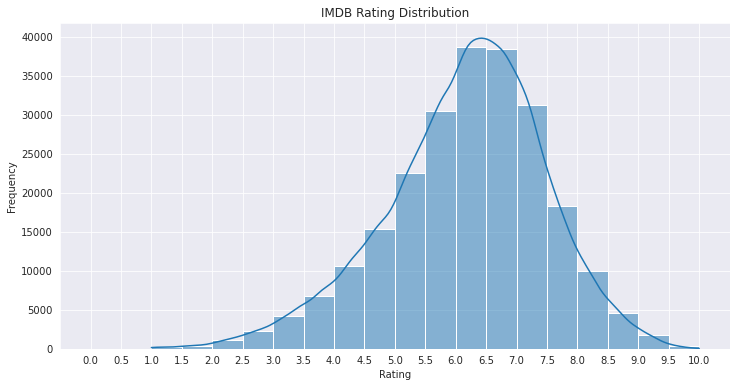

In [29]:
plt.figure(figsize=(12,6))
plt.title("IMDB Rating Distribution") #setting the title of the plot
plt.xlabel('Rating') # setting the x label of the plot
plt.ylabel('Frequency') # setting the y label of the plot
bin_range = list(np.arange(0,10.5,0.5))
plt.xticks(bin_range)
sns.histplot(df['averageRating'], kde=True, bins=bin_range)
plt.savefig('results/ratings_hist.png')

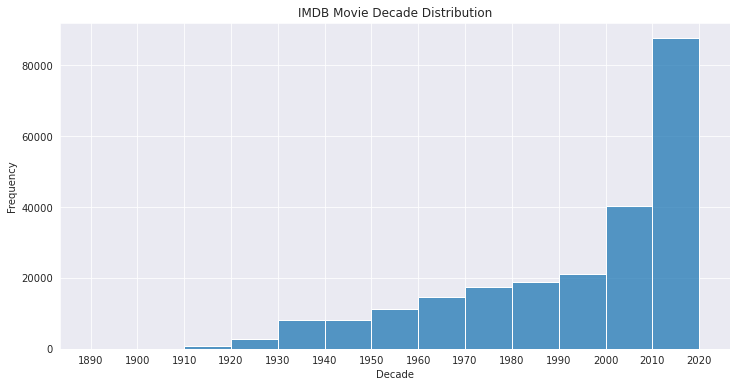

In [30]:
plt.figure(figsize=(12,6))
plt.title("IMDB Movie Decade Distribution") #setting the title of the plot
plt.xlabel('Decade') # setting the x label of the plot
plt.ylabel('Frequency') # setting the y label of the plot
years = df.year
bin_range = list(np.arange(1890,years.max(), 10))
plt.xticks(bin_range)
sns.histplot(years, bins=bin_range)
plt.savefig('results/decades_hist.png')

In [31]:
df['decade'] = df['year'].astype("str").str[:-1] + "0s"
votes_count = df[['decade', 'numVotes']].groupby('decade').sum()
votes_count.reset_index(inplace=True)
votes_count

,decade,numVotes
0,1890s,80.0
1,1900s,1411.0
2,1910s,211004.0
3,1920s,1870896.0
4,1930s,5870434.0
5,1940s,9220276.0
6,1950s,15012272.0
7,1960s,20455740.0
8,1970s,34114898.0
9,1980s,64061418.0


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


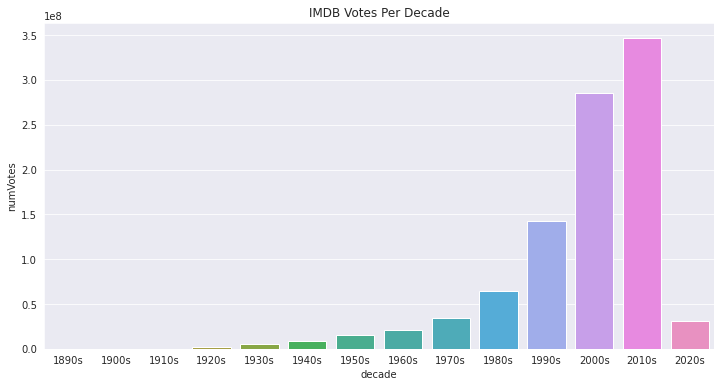

In [32]:
plt.figure(figsize=(12,6))
plt.title("IMDB Votes Per Decade") #setting the title of the plot
sns.barplot(votes_count['decade'], votes_count['numVotes'])
plt.savefig("results/votes_decade.png")

In [33]:
from collections import Counter

## initialize a counter for the positions
genres_count = Counter()

## loop over rows to count up the positions
for ix, row in df.iterrows():
    genres_count[row["genres"]] += 1

In [34]:
list(genres_count.keys())[:10]

['Action,Adventure,Biography',
 'Drama',
 'Adventure,Fantasy',
 'Adventure,Drama',
 'Biography,Drama,Family',
 'War',
 'Biography,Drama,History',
 'Drama,Romance',
 'Drama,History',
 'Adventure,Drama,Fantasy']

In [35]:
# Get the top 10 profitable movies by using position based indexing. Specify the rows till 10 (0-9)
top10 = df.sort_values(by="averageRating",ascending=False).iloc[:500]
top10

,title,year,runtime,genres,averageRating,numVotes,decade
movieID,,,,,,,
tt14178564,Galaksija - racunar koji je odbio da umre!,2021,55,Documentary,10.0,8.0,2020s
tt12980094,Days of Géants II,2020,80,Documentary,10.0,188.0,2020s
tt17001790,Caso Pesseghini - Investigação Criminal,2021,80,"Biography,Documentary",10.0,45.0,2020s
tt11257676,Yudh,2019,59,Musical,10.0,5.0,2010s
tt16348520,Yooper Tours: on the North Country Trail,2017,57,Documentary,10.0,8.0,2010s
...,...,...,...,...,...,...,...
tt1756640,Nero's Guests,2009,55,Documentary,9.3,117.0,2000s
tt4514926,Here We Are,2017,108,Drama,9.3,20.0,2010s
tt2430074,Acqua fuori dal ring,2012,113,"Drama,History,News",9.3,12.0,2010s


In [37]:
all_rec_df = [pd.Series(row['year'],row['genres'].split(","))              
                    for _, row in df.iterrows()]
all_rec_df = pd.concat(all_rec_df).reset_index()
all_rec_df

,index,0
0,Action,1906
1,Adventure,1906
2,Biography,1906
3,Drama,1907
4,Adventure,1908
...,...,...
420032,Thriller,2020
420033,Thriller,2020
420034,Drama,2020
420035,History,2020


In [39]:
all_rec_df.columns = ['genre','year']
all_rec_df['year'] = all_rec_df['year'].astype('str')
all_genres = all_rec_df.loc[all_rec_df.genre != "Adult"]
all_genres

,genre,year
0,Action,1906
1,Adventure,1906
2,Biography,1906
3,Drama,1907
4,Adventure,1908
...,...,...
420032,Thriller,2020
420033,Thriller,2020
420034,Drama,2020
420035,History,2020


In [40]:
year_genre = pd.pivot_table(all_genres,  index=['year'], columns=['genre'], aggfunc= len,fill_value=0)
year_genre['Total'] = year_genre.sum(axis = 1)
year_genre

genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,Total
year,,,,,,,,,,,,,,,,,,,,,
1896,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1899,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,3
1900,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1904,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1905,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,834,454,244,346,2052,566,2188,3767,371,315,...,2,750,258,2,152,1,1005,99,42,15380
2019,843,440,249,347,1901,605,2214,3755,360,261,...,5,716,232,1,157,1,993,99,38,15080
2020,493,314,180,209,1287,391,1740,2579,246,235,...,1,477,218,1,98,2,792,72,22,10779


In [41]:
year_genre.sum().sort_values()

genre
Game-Show           2
Talk-Show           6
Short              23
Reality-TV         31
News              639
Film-Noir         762
Sport            3076
Animation        4355
Western          4833
War              5552
Musical          5579
Music            6052
Sci-Fi           6091
History          7178
Fantasy          7435
Biography        7941
Mystery          9687
Family           9806
Adventure       15716
Horror          17842
Thriller        20834
Crime           21876
Action          25213
Romance         27748
Documentary     37761
Comedy          62285
Drama          111690
Total          420013
dtype: int64

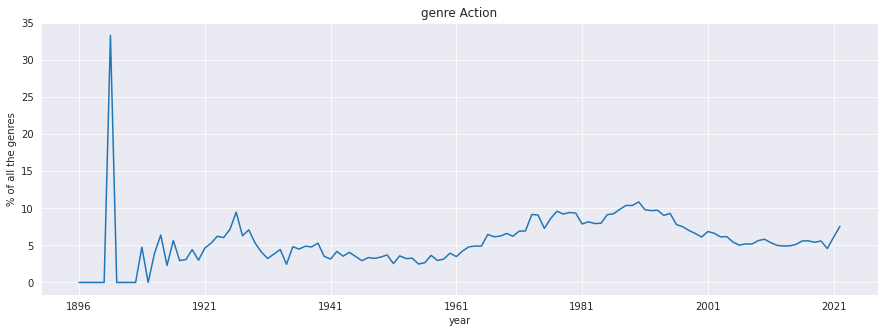

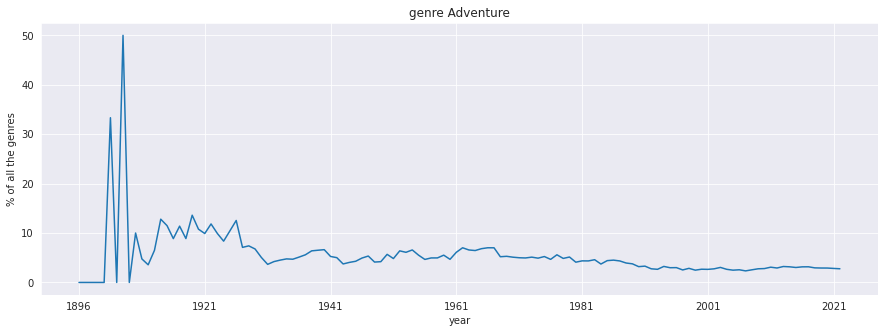

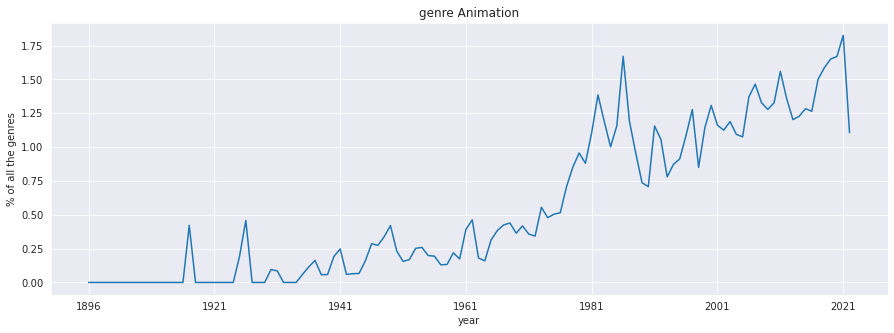

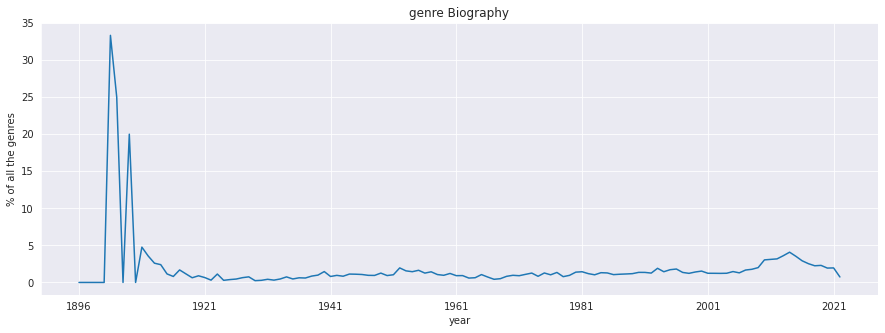

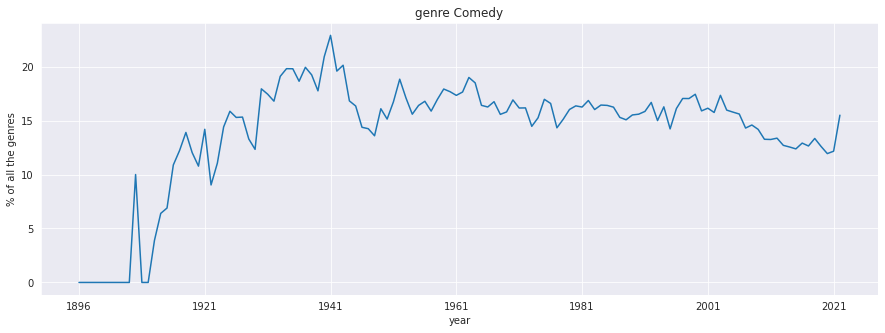

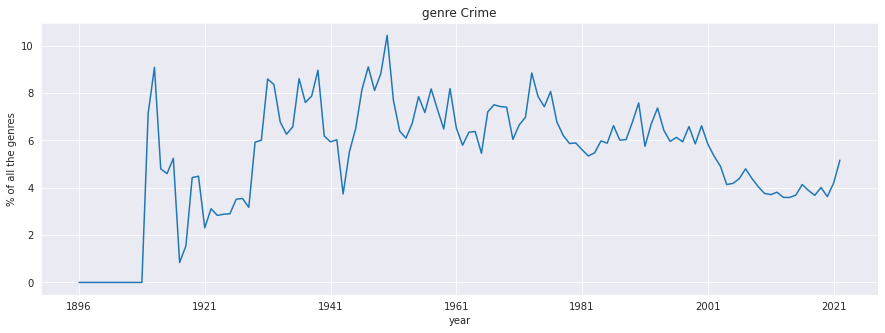

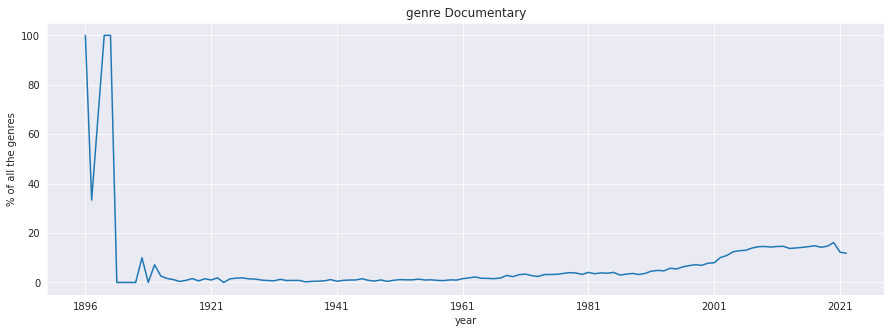

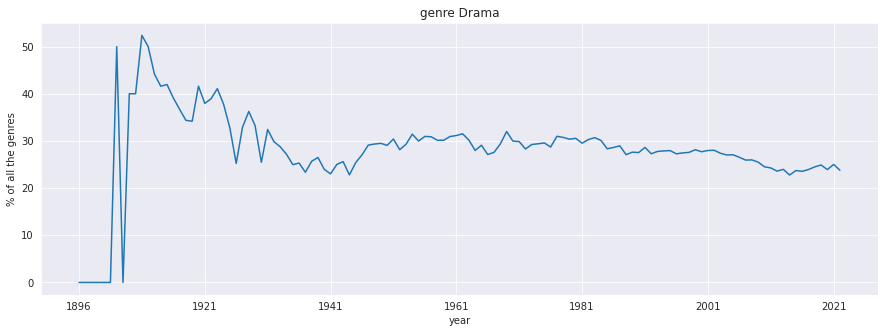

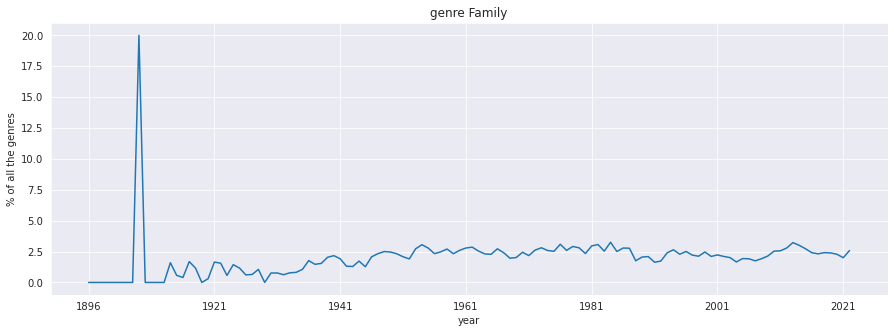

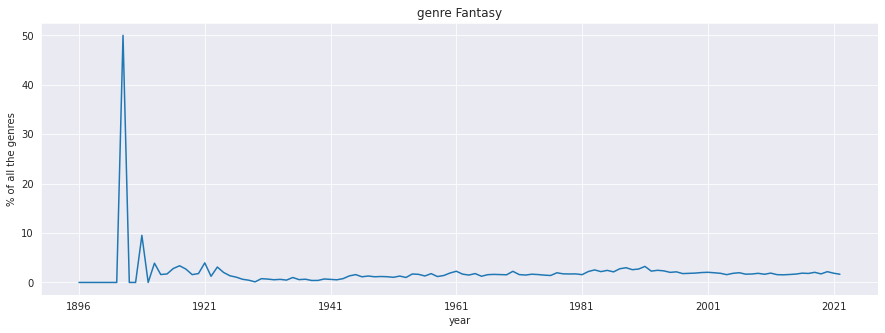

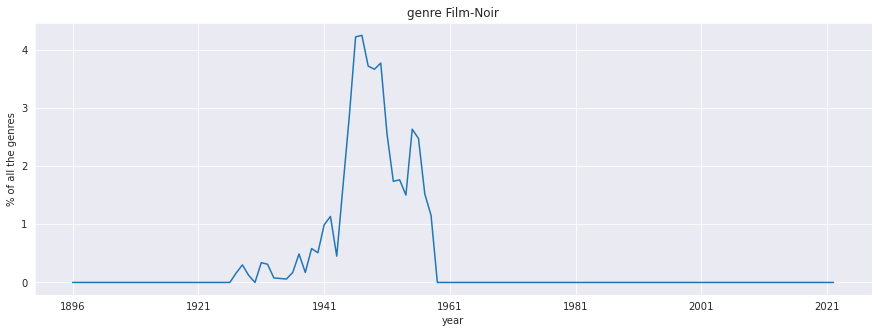

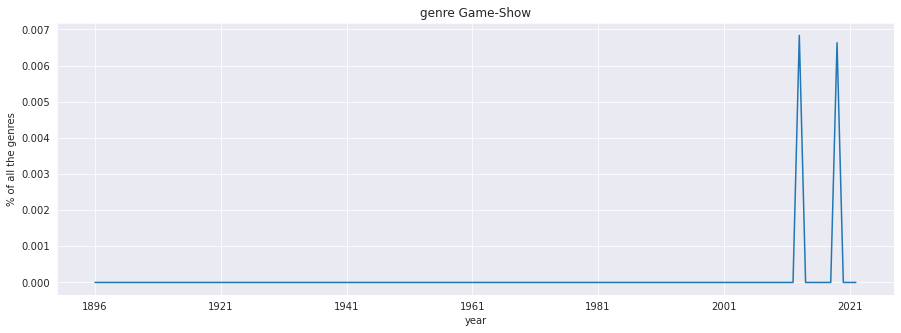

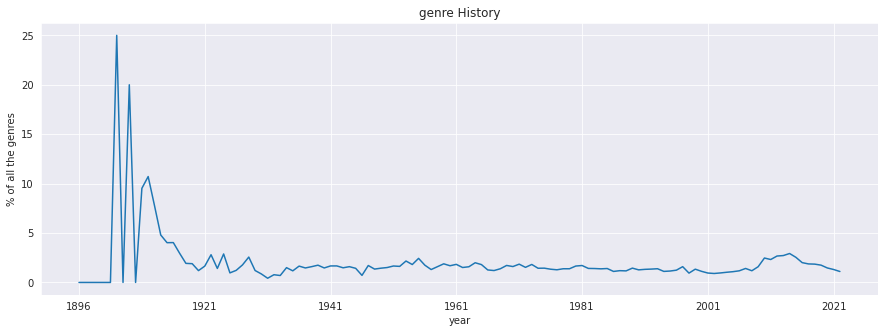

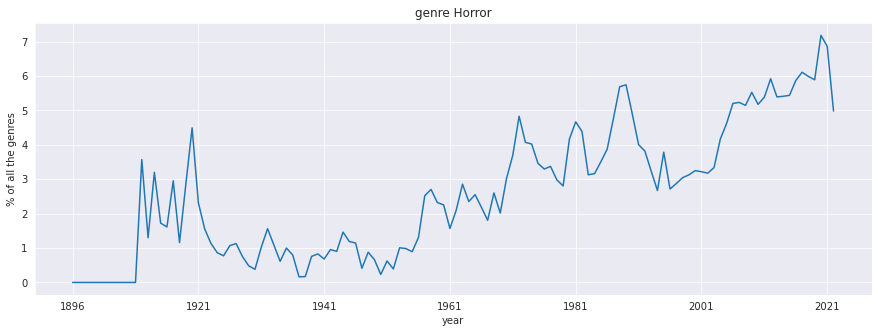

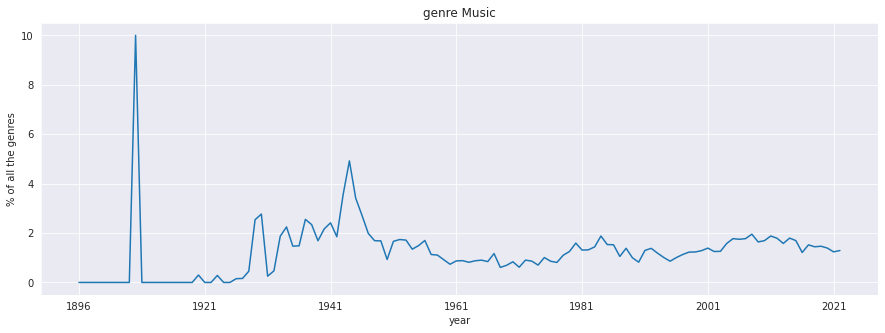

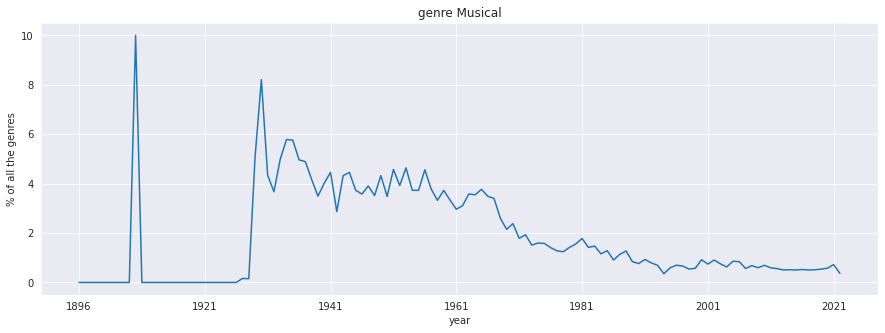

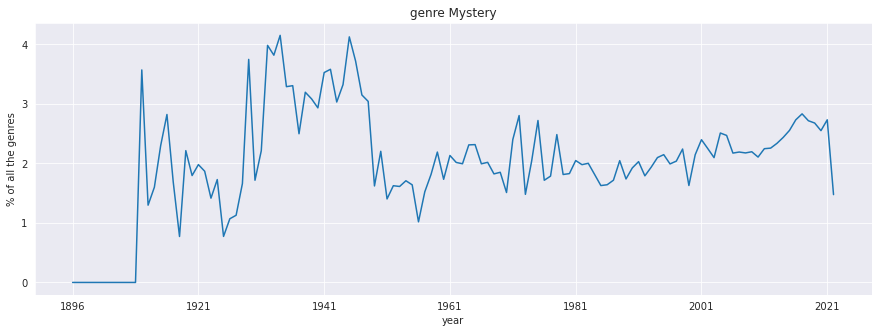

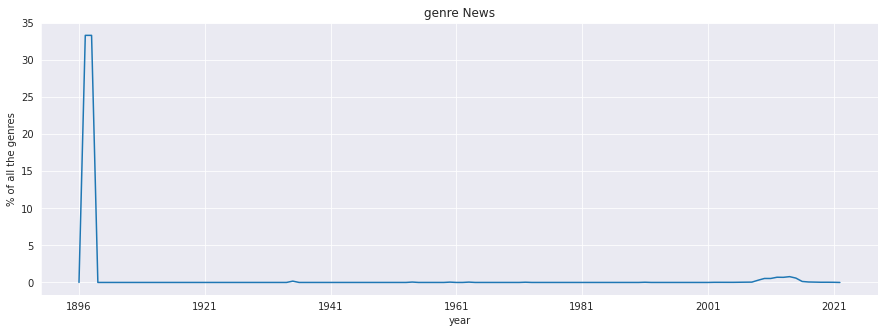

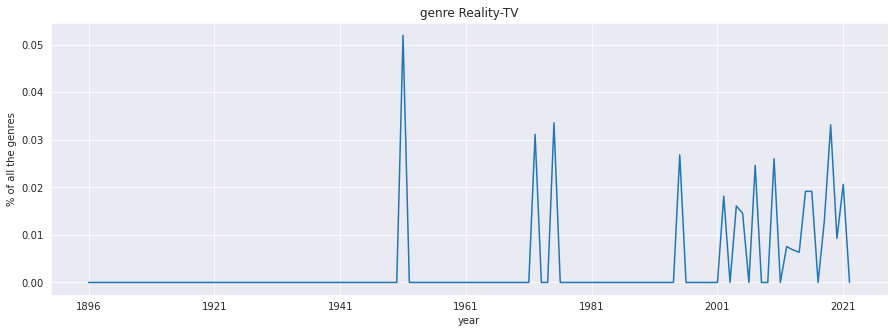

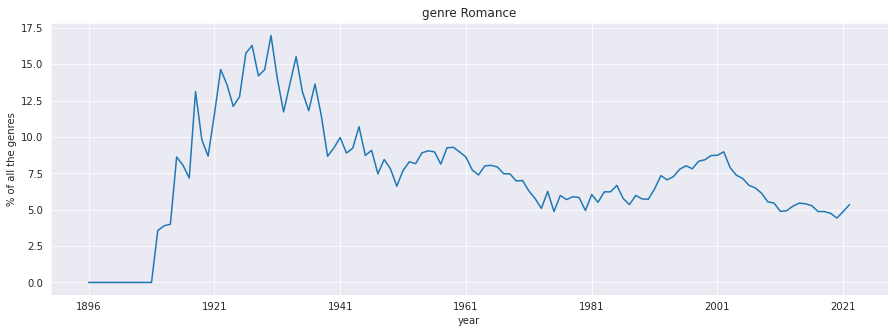

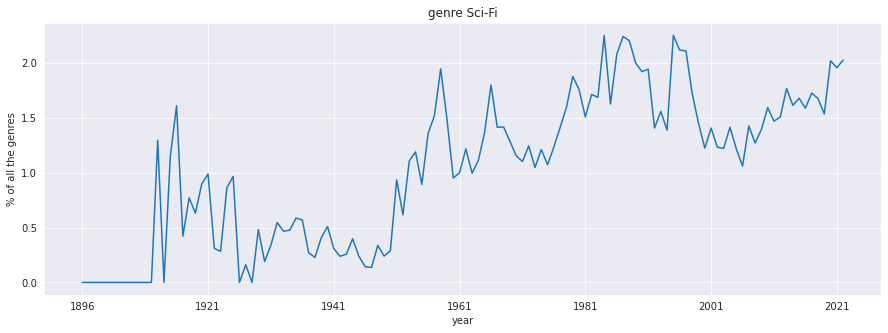

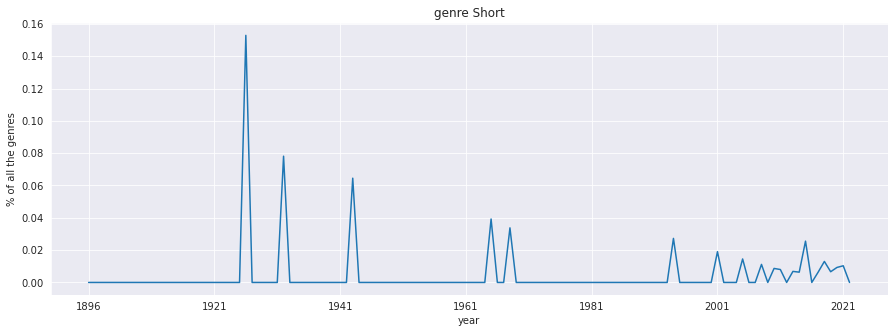

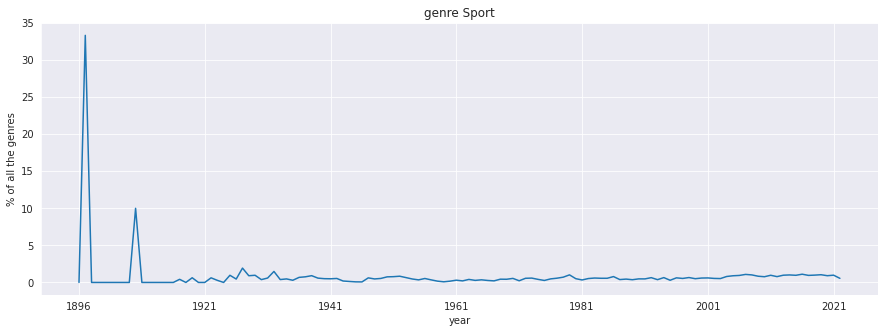

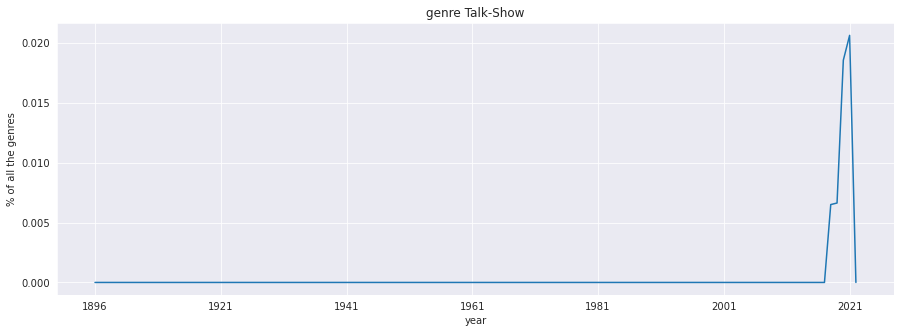

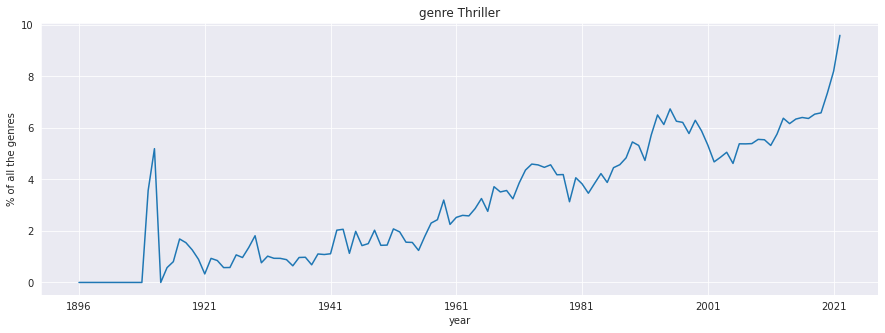

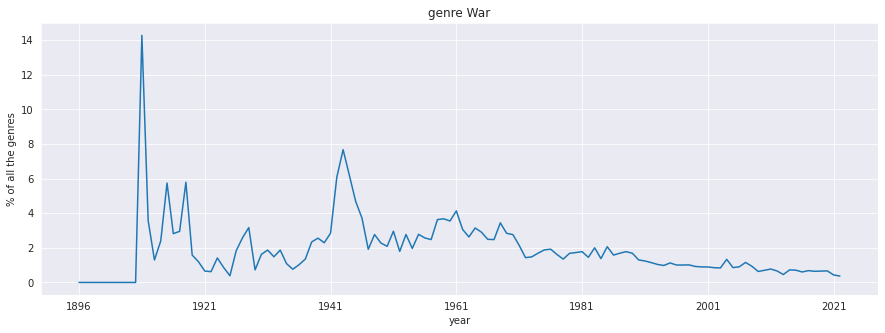

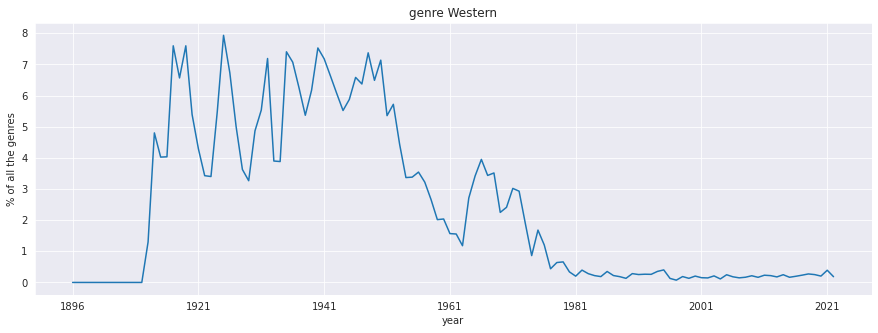

In [42]:
for column  in year_genre.columns[:-1] :
    
    (year_genre[column]*100/year_genre['Total']).sort_index().loc[:'2022'].plot(title = f"genre {column}", 
                                                                                ylabel = '% of all the genres' 
                                                                                , figsize= (15,5))
    plt.show()

In [43]:
#df['decade'] = (df['decade'].str[:-1]).astype("int")
decade_df = [pd.Series(row['decade'],row['genres'].split(","))              
                    for _, row in df.iterrows()]
decade_df = pd.concat(decade_df).reset_index()
decade_df

,index,0
0,Action,1900s
1,Adventure,1900s
2,Biography,1900s
3,Drama,1900s
4,Adventure,1900s
...,...,...
420032,Thriller,2020s
420033,Thriller,2020s
420034,Drama,2020s
420035,History,2020s


In [44]:
decade_df.columns = ['genre','decade']
decade_df['decade'] = decade_df['decade'].astype('str')
decade_info = decade_df.loc[decade_df.genre != "Adult"]
decade_info

,genre,decade
0,Action,1900s
1,Adventure,1900s
2,Biography,1900s
3,Drama,1900s
4,Adventure,1900s
...,...,...
420032,Thriller,2020s
420033,Thriller,2020s
420034,Drama,2020s
420035,History,2020s


In [45]:
decade_genre = pd.pivot_table(decade_info,  index=['decade'], columns=['genre'], aggfunc= len,fill_value=0)
decade_genre['Total'] = decade_genre.sum(axis = 1)
decade_genre

genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,Total
decade,,,,,,,,,,,,,,,,,,,,,
1890s,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,1,0,0,0,0,4
1900s,1,2,0,3,0,0,5,4,1,1,...,0,0,0,0,0,0,0,0,0,20
1910s,59,159,1,20,154,56,18,569,11,37,...,0,126,12,0,4,0,20,52,83,1495
1920s,313,453,4,27,664,182,66,1708,39,62,...,0,686,21,1,37,0,52,73,240,4938
1930s,649,775,10,91,2817,1145,100,4002,185,91,...,0,1927,62,1,99,0,134,239,880,15022
1940s,531,724,32,160,2675,1031,131,3955,290,154,...,0,1360,43,1,57,0,239,614,998,15175
1950s,632,1112,39,268,3392,1500,205,6095,502,276,...,1,1719,238,0,97,0,404,550,802,20258
1960s,1354,1591,86,198,4363,1760,479,7611,622,427,...,0,2008,327,2,80,0,773,784,673,25663
1970s,2511,1543,172,319,4815,2160,997,9051,808,515,...,2,1789,394,0,164,0,1255,548,486,30478


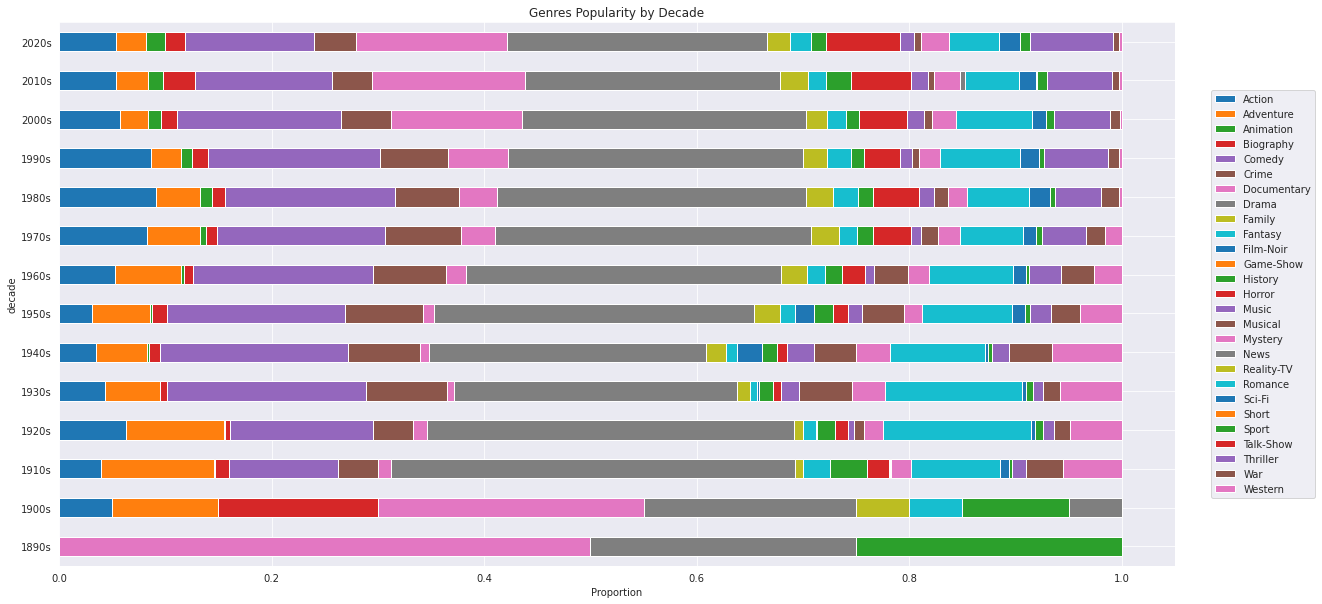

In [46]:
decade_genre_fractions = decade_genre.iloc[:,:-1].div(decade_genre['Total'], axis = 0)
decade_genre_fractions.plot(kind = 'barh', stacked = True, figsize=(20,10))
plt.legend(loc='center right', bbox_to_anchor=(1.13, 0.5))
plt.title("Genres Popularity by Decade")
plt.xlabel("Proportion")
plt.savefig("results/genres_decade.png")

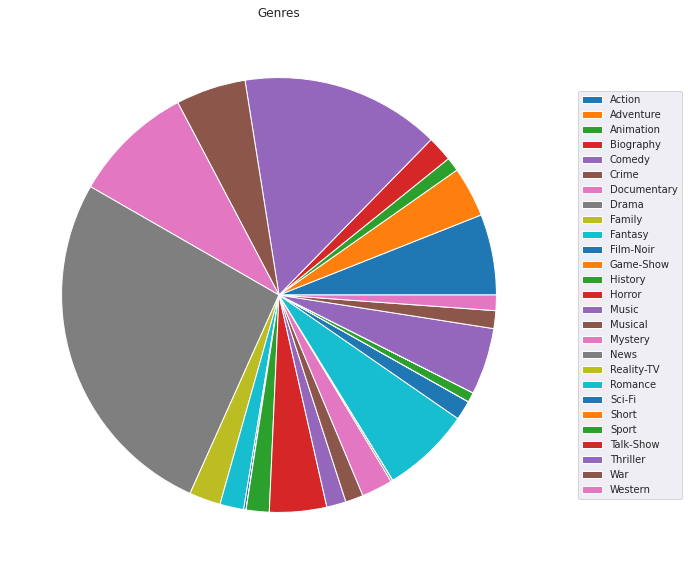

In [51]:
data = pd.DataFrame(year_genre.sum()[:-1])
data.reset_index(inplace=True)
data.rename(columns={0:'occurance'}, inplace=True)

plt.figure(figsize=(12,10))
plt.title("Genres")
patches, texts = plt.pie(data['occurance'])
plt.legend(patches, data['genre'], loc='center right', bbox_to_anchor=(1.25, 0.5))
plt.savefig('results/pie_chart.png')

In [34]:
from multiprocessing.sharedctypes import Value
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

movies =pd.read_csv("datasets/clean_data.tsv", sep='\t')
movies.drop(movies[movies['runtime'] == r"\N"].index, inplace = True)
movies.drop(movies[movies['genres'] == r"\N"].index, inplace = True)

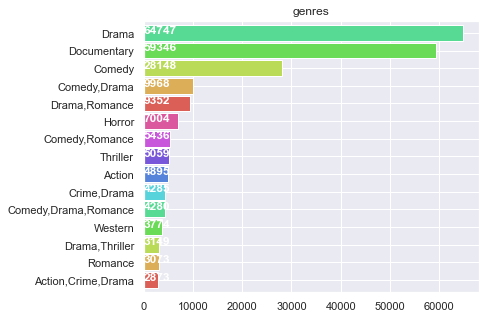

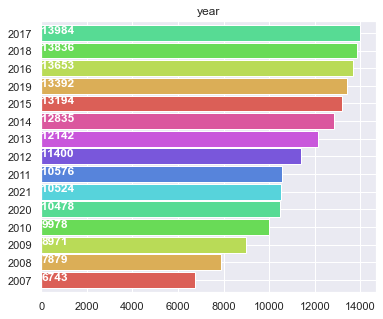

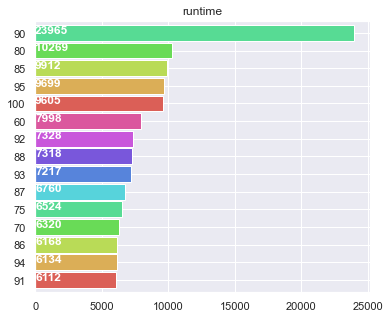

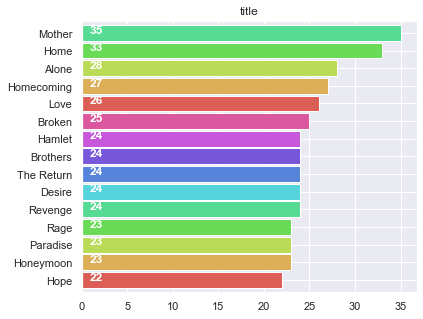

In [35]:
def top15_occurence(feature_name):
    plt.subplots(figsize=(6,5))
    list1 = []
    for i in movies[feature_name]:
        list1.append(i)
    ax = pd.Series(list1).value_counts()[:15].sort_values().plot.barh(width=0.9,color=sns.color_palette('hls',10))
    for i, v in enumerate(pd.Series(list1).value_counts()[:15].sort_values().values): 
        ax.text(.9, i, v,fontsize=12,color='white',weight='bold')
    plt.title(feature_name)
    plt.show()

feature_list=['genres','year','runtime','title' ]
for i in feature_list:
    top15_occurence(i)

### 7. KNN Model 

K-NearestNeighbor (kNN) classification algorithm is one of the simplest methods in data mining classification. K nearest neighbors, means that every sample can be represented by its K nearest neighbors.

The core idea of kNN algorithm is that if most of the k closest samples in the feature space belong to a certain category, then the sample also belongs to this category and has the characteristics of the samples in this category. This method only determines the classification of the samples according to the category of the nearest one or several samples. The kNN method is only concerned with a very small number of adjacent samples. 

##### Why do we use KNN? 

Because THE KNN method mainly relies on the surrounding limited adjacent samples rather than the method of discriminating the class domain to determine the category, the kNN method is more suitable than other methods for the sample sets to be divided with more overlapping or overlapping class domains.

#### Reshaping the dataframe to make it compatible for KNN algorithm implementation

We need to transform (reshape in this case) the data in such a way that each row of the dataframe represents a movie and each column represents a different user. So we want the data to be [movies, users] array if movie is the subject where similar movies must be found and [users, movies] array for reverse.



To reshape the dataframe, we will pivot the dataframe to the wide format with movies as rows and users as columns. As we know that not all users watch all the movies, we can expect a lot of missing values. We will have to fill those missing observations with 0s since we are going to perform linear algebra operations (calculating distances between vectors).



Finally, we transform the values of the dataframe into a scipy sparse matrix for most efficient calculations.

This dataframe is then fed into a KNN model.

In [40]:
movie_dataset = pd.read_csv('datasets/movies.csv')
rating_dataset = pd.read_csv('datasets/ratings.csv')

merged_dataset = pd.merge(movie_dataset , rating_dataset, how='inner', on='movieId')
new_dataset = merged_dataset.groupby(by=['userId','title'], as_index=False).agg({"rating":"mean"})
movie_to_user_df = new_dataset.pivot(
     index='title',
   columns='userId',
      values='rating').fillna(0)

In [41]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #visualisation
%matplotlib inline 
sns.set(color_codes=True)
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors



sparse_df = csr_matrix(movie_to_user_df.values)
knn_model = NearestNeighbors(metric='cosine', algorithm='brute')
knn_model.fit(sparse_df)

NearestNeighbors(algorithm='brute', metric='cosine')

In [43]:
def Recommended_similar_movies(movie, n = 10):
    
  
    index = dict_movie[movie]
    knn_input = np.asarray([movie_to_user_df.values[index]])
    n = min(len(list_movies)-1,n)
    distances, indices = knn_model.kneighbors(knn_input, n_neighbors=n+1)
  
    print("The top",n,"movies , which are very much similar to the movie (",movie, ") are: ")
    print(" ")
    for i in range(1,len(distances[0])):
        print(list_movies[indices[0][i]])

### 8. Test the KNN Model -- Results 

In [46]:
from pprint import pprint
list_movies = list(movie_to_user_df.index)
# list_movies [:10]
dict_movie = {movie : index for index, movie in enumerate(list_movies)}
# print(dict_movie)

movie_name = '101 Dalmatians (1996)'

Recommended_similar_movies(movie_name,10) # top 10 Recommended movies

The top 10 movies , which are very much similar to the movie ( 101 Dalmatians (1996) ) are: 
 
All Dogs Go to Heaven 2 (1996)
Flipper (1996)
101 Dalmatians (One Hundred and One Dalmatians) (1961)
Fox and the Hound, The (1981)
Blank Check (1994)
Dragonheart (1996)
First Wives Club, The (1996)
Space Jam (1996)
James and the Giant Peach (1996)
Balto (1995)


In [47]:
movie_name = 'All Dogs Go to Heaven 2 (1996)'

Recommended_similar_movies(movie_name,10) # top 10 Recommended movies

The top 10 movies , which are very much similar to the movie ( All Dogs Go to Heaven 2 (1996) ) are: 
 
Muppet Treasure Island (1996)
Homeward Bound II: Lost in San Francisco (1996)
Flipper (1996)
Phantom, The (1996)
101 Dalmatians (1996)
White Squall (1996)
Crow: City of Angels, The (1996)
Substitute, The (1996)
Mulholland Falls (1996)
Eye for an Eye (1996)


#### Observation: As you can see the first test for movie (101 Dalmatians (1996) ) gaves us top 10 recommende movies. The second test we take one of the result (All Dogs Go to Heaven 2 (1996)), and it return (101 Dalmatians (1996) ) as recommended movie

### 9. Dynamically suggesting movie name

#### 9.1 Collaborative filtering, simply is the use of certain interests, share a common experience of the group to recommend the be fond of of interest to the user information, personal response through cooperation mechanism to give a fair degree of information (such as grading) and recorded in order to achieve the purpose of filtering and screening information to help others, have different response is limited to particularly interested in, Keeping track of particularly uninteresting information is also important. Collaborative filtering can be divided into rating or social filtering. Later, it becomes a very important part of e-commerce, that is, to recommend the "items that a customer may like" according to the previous purchase behavior of a customer and the purchase behavior of customers with similar purchase behavior, that is, to provide personalized information, goods and other recommendation services based on community preferences. In addition to the recommended, in recent years also developed a mathematical operation to let the system automatically calculate the strength of the preference to QuWuCunJing makes the content of the filter is more basis, one hundred percent may not be entirely accurate, but as a result of joined the strength comparison to the application of the concept is more extensive, in addition to the electronic commerce is the information retrieval, the network personal video ark, application of personal bookshelves, etc.

#### The major challenge is not to recommend similar movie titles, it is to let the user type in the correct movie title.

#### To address this challenge, a new functionality has been written.

In [48]:
case_insensitive_MList = [i.lower() for i in list_movies]

#### Dynamically suggesting movie name from the existing movie corpus we have, based on the user input using try and except architecture.

#### function which takes input and returns suggestions for the user


In [49]:
def get_possible_movies(movie):
    
    temp = ''
    suggestions_movies = case_insensitive_MList.copy()
    for i in movie :
        result = []
        temp += i
        for j in suggestions_movies:
            if temp in j:
                result.append(j)
        if len(result) == 0:
            return suggestions_movies
        result.sort()
        suggestions_movies = result.copy()

    return suggestions_movies

#### This function provides user with movie name suggestions if movie name is mis-spelled or Recommends similar movies to the input movie if the movie name is valid.

In [59]:
class invalid(Exception):
    pass

def spell_correction():
    try:
        movie_name = input("Enter the Movie name: ")
        movie_name_lower = movie_name.lower()
        if movie_name_lower not in case_insensitive_MList :
            raise invalid
        else :
            num_recom = int(input("Enter Number of movie recommendations needed: "))
            Recommended_similar_movies(list_movies[case_insensitive_MList.index(movie_name_lower)],num_recom)

    except invalid:
        possible_movies = get_possible_movies(movie_name_lower)

        if len(possible_movies) == len(list_movies) :
            print("Movie name entered is does not exist in the list ")
        else :
            indices = [case_insensitive_MList.index(i) for i in possible_movies]
            print("Entered Movie name is not matching with any movie from the dataset . Please check the below suggestions :\n",[list_movies[i] for i in indices])
            spell_correction()

In [60]:
spell_correction()

Enter the Movie name: back
Entered Movie name is not matching with any movie from the dataset . Please check the below suggestions :
 ['3 Ninjas Kick Back (1994)', 'Apollo 13: To the Edge and Back (1994)', 'Back in the Day (2014)', 'Back Soon (2007)', 'Back Stage (2000)', 'Back to School (1986)', 'Back to the Beach (1987)', 'Back to the Future (1985)', 'Back to the Future Part II (1989)', 'Back to the Future Part III (1990)', 'Back-up Plan, The (2010)', 'Backbeat (1993)', 'Backcountry (2014)', 'Backdraft (1991)', 'Blackadder Back & Forth (1999)', "Bon Voyage, Charlie Brown (and Don't Come Back!) (1980)", 'Brokeback Mountain (2005)', 'Cashback (2004)', 'Cashback (2006)', 'Come Back to the Five and Dime, Jimmy Dean, Jimmy Dean (1982)', "Devil's Backbone, The (Espinazo del diablo, El) (2001)", "Don't Look Back (1967)", 'Futurama: The Beast with a Billion Backs (2008)', 'George Carlin: Back in Town (1996)', 'Ginger Snaps Back: The Beginning (2004)', 'How Stella Got Her Groove Back (1998)',

#### 9.2  The Advantages and Disadvantages

#### Advantages:

It can filter information that is difficult for machines to automatically analyze content, such as art, music, etc.

Sharing other people's experiences avoids incomplete or imprecise content analysis and enables filtering based on complex, hard-to-articulate concepts such as information quality and personal taste.

Ability to recommend new information. Information that is completely different in content can be found, and users can't anticipate the content of the recommendation information in advance. You can discover users' potential interests and preferences that you have not yet discovered.

The recommendation is personalized and highly automated. Effective use of feedback from other similar users. Speed up personalized learning.

#### Disadvantages:
Although collaborative filtering as a recommendation mechanism has its application, there are still many problems to be solved. Overall, the most typical problems are:

New User Problem The system started with poor recommendation quality

The quality of the New Item Problem depends on the historical data set

Sparsity Problem

System Scalability problem

### 10. Future Work


We will try to use other filter functions to predict top 10 movies based on our dataset. 

Demographic Filtering - They offer generalized recommendations to every user, based on movie popularity and/or genre. The System recommends the same movies to users with similar demographic features. Since each user is different , this approach is considered to be too simple. The basic idea behind this system is that movies that are more popular and critically acclaimed will have a higher probability of being liked by the average audience.


Content Based Filtering - They suggest similar items based on a particular item. This system uses item metadata, such as genre, director, description, actors, etc. for movies, to make these recommendations. The general idea behind these recommender systems is that if a person liked a particular item, he or she will also like an item that is similar to it.
